**IMPORT OF LIBRARIES**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

**LOADING THE DATA**

In [ ]:
mydata = pandas.read_csv('ncaa_tournament.csv')
mydata.head()

,year,round,favorite,underdog,favorite_probability,favorite_win_flag
0,2014,2,Texas,Arizona State,0.50,1
1,2013,2,Illinois,Colorado,0.50,1
2,2013,1,James Madison,Long Island,0.51,1
3,2011,2,Cincinnati,Missouri,0.51,1
4,2012,3,Cincinnati,Florida State,0.51,1


**DATA Viewing**

In [ ]:
frame=10
view=mydata.head(Glance)
print(view)


    year  round  ... favorite_probability favorite_win_flag
0   2014      2  ...                 0.50                 1
1   2013      2  ...                 0.50                 1
2   2013      1  ...                 0.51                 1
3   2011      2  ...                 0.51                 1
4   2012      3  ...                 0.51                 1
5   2011      5  ...                 0.51                 0
6   2013      1  ...                 0.52                 1
7   2014      1  ...                 0.52                 1
8   2011      2  ...                 0.52                 0
9   2013      6  ...                 0.52                 1
10  2014      2  ...                 0.52                 0
11  2012      2  ...                 0.52                 1
12  2014      1  ...                 0.52                 1
13  2012      1  ...                 0.53                 0
14  2012      4  ...                 0.53                 1

[15 rows x 6 columns]


**DIMENSION OF DATASET**

In [ ]:
dimension=mydata.shape
print(dimension)

(253, 6)


**DATA TYPE**

In [ ]:
data_type=mydata.dtypes
print(data_type)

year                      int64
round                     int64
favorite                 object
underdog                 object
favorite_probability    float64
favorite_win_flag         int64
dtype: object


In [ ]:
#Description
description=mydata.describe()
print(description)

          year   round  favorite_probability  favorite_win_flag
count   253.00  253.00                253.00             253.00
mean   2012.41    2.68                  0.72               0.70
std       1.09    1.16                  0.14               0.46
min    2011.00    1.00                  0.50               0.00
25%    2011.00    2.00                  0.60               0.00
50%    2012.00    2.00                  0.70               1.00
75%    2013.00    3.00                  0.85               1.00
max    2014.00    7.00                  1.00               1.00


**Rounding-off results upto 2 digits after decimal**

In [ ]:
pd.set_option('precision', 2)
precision=mydata.describe()
print(precision)

          year   round  favorite_probability  favorite_win_flag
count   253.00  253.00                253.00             253.00
mean   2012.41    2.68                  0.72               0.70
std       1.09    1.16                  0.14               0.46
min    2011.00    1.00                  0.50               0.00
25%    2011.00    2.00                  0.60               0.00
50%    2012.00    2.00                  0.70               1.00
75%    2013.00    3.00                  0.85               1.00
max    2014.00    7.00                  1.00               1.00


In [ ]:
count=mydata.groupby('favorite').size()
print (count)

favorite
Alabama             1
Albany              1
Arizona             6
Baylor              4
Brigham Young       2
                   ..
West Virginia       2
Western Kentucky    1
Wichita State       4
Wisconsin           8
Xavier              4
Length: 72, dtype: int64


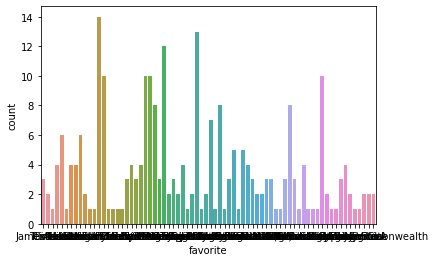

In [ ]:
#Based on count, plot of "favourite" distribution
import seaborn as sns
sns.countplot(mydata['favorite'],label="count")
plt.show()

In [ ]:
#Checking coorelation
Correlations=mydata.corr()
print(Correlations)

                      year  round  favorite_probability  favorite_win_flag
year                  1.00  -0.15                  0.08               0.07
round                -0.15   1.00                 -0.10              -0.06
favorite_probability  0.08  -0.10                  1.00               0.27
favorite_win_flag     0.07  -0.06                  0.27               1.00


In [ ]:
#Skewness
Skewness=mydata.skew()
print(Skewness)

year                    0.09
round                   1.42
favorite_probability    0.30
favorite_win_flag      -0.88
dtype: float64


**HISTOGRAM PLOT**

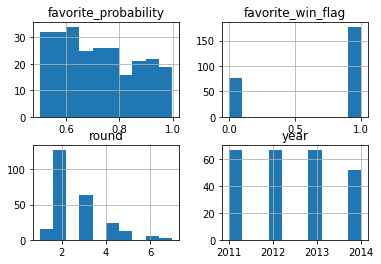

In [ ]:
histogram=mydata.hist()
plt.show()

**Correlation Matrix**

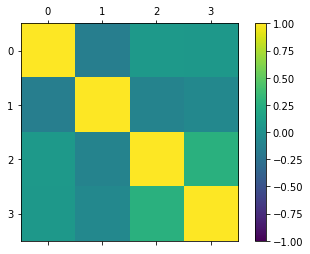

In [ ]:
correlations = mydata.corr()
# plotting the correlation matrix
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)#
#ax.set_xlabel(col_names)
#ax.set_ylabel(col_names)
plt.show()

**Scatter plot Matrix**

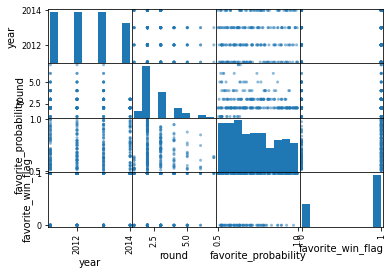

In [ ]:
Matrix=scatter_matrix(mydata)

**Data Defining**

In [ ]:
x=mydata[['year', 'round', 	'favorite', 	'underdog', 	'favorite_probability' ]]
y=mydata[['favorite_win_flag']]

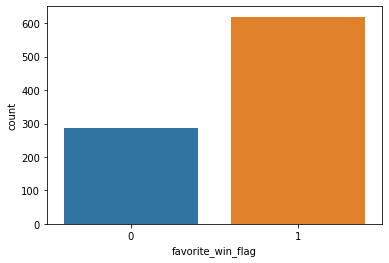

In [ ]:
#Plotting output based on count
sns.countplot(dataset['favorite_win_flag'],label="count")
plt.show()

**Dropping Values**

In [ ]:
x.drop(['year', 	'favorite', 	'underdog' ],axis=1,inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


**Printing X**

In [ ]:
print(x)

     round  favorite_probability
0        2                  0.50
1        2                  0.50
2        1                  0.51
3        2                  0.51
4        3                  0.51
..     ...                   ...
248      2                  0.99
249      2                  0.99
250      2                  0.99
251      2                  0.99
252      2                  1.00

[253 rows x 2 columns]


**Splitting data into 70:30 ratio**

In [ ]:
train_data, test_data, train_label, test_label = train_test_split(x, y, test_size=0.3, random_state=15)

**DecisionTree**

In [ ]:
Dtree = DecisionTreeClassifier()

**Fitting of model**

In [ ]:
Dtree = Dtree.fit(train_data, train_label)

**Prediction**

In [ ]:
Dtree_label_predict = Dtree.predict(test_data)

**Accuracy**

In [ ]:

Dtree_Accuracy = metrics.accuracy_score(test_label, Dtree_label_predict)


In [ ]:
print ('Accuracy for Decision Tree =', Dtree_accuracy * 100)

Accuracy for Decision Tree = 60.526315789473685


In [ ]:
test_data.mean()

round                   2.67
favorite_probability    0.75
dtype: float64

In [ ]:
test_label.mean()

favorite_win_flag    0.74
dtype: float64

**KNN**

In [ ]:
KNNClass = KNeighborsClassifier()

**Model** **Fitting**

In [ ]:
KNNClass = KNNClass.fit(train_data, train_label)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


**Prediction**

In [ ]:
KNN_label_predict = KNNClass.predict(test_data)

**Accuracy**

In [ ]:
KNNClass_Accuracy = metrics.accuracy_score(test_label, KNN_label_predict)
print ('Accuracy for KNN =', KNNClass_Accuracy * 100)

Accuracy for KNN = 67.10526315789474


**Naive Bayes Classifier**

In [ ]:
NB = GaussianNB()

**Model Fitting**

In [ ]:
NB = NB.fit(train_data,train_label)

/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


**Prediction**

In [ ]:
NB_label_predict = NB.predict(test_data)

**Accuracy**

In [ ]:
NB_Accuracy = metrics.accuracy_score(test_label, NB_label_predict)
print ('Accuracy for Naive Bayes Classifier =', NB_Accuracy * 100)

Accuracy for Naive Bayes Classifier = 75.0
